<a href="https://colab.research.google.com/github/annsyj94/YouTube-Trends-2021/blob/main/BBC_Trending_Videos_by_Category_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***BBC Trending Videos by Category ***


This task was helping my colleague for planning YouTube strategy in the future.
(World Smart Sustainable Cities Organization)

In [1]:
import pandas as pd 
import seaborn as sns 
% matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Read the document 
bbc = pd.read_csv("bbc.csv")
bbc.head(2)

,position,channel_id,channel_title,video_id,published_at,video_title,video_description,video_category_id,video_category_label,duration,duration_sec,dimension,definition,caption,licensed_content,view_count,like_count,dislike_count,favorite_count,comment_count
0,1,UCCj956IF62FbT7Gouszaj9w,BBC,8qH0pGdjB_U,2020-08-13T15:00:02Z,Colin Robinson's Origins of the Species - What...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT5M23S,323,2d,hd,False,1.0,738,76.0,7.0,0,4.0
1,2,UCCj956IF62FbT7Gouszaj9w,BBC,lqeS-rOoBSw,2020-08-13T14:30:04Z,Maisie Smith and Zack Morris on EastEnders' la...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,PT3M15S,195,2d,hd,False,1.0,512,55.0,9.0,0,13.0


In [3]:
# Delete the columnn 
bbc = bbc.drop(["video_id","duration"], axis = 1)
bbc.head(2)

,position,channel_id,channel_title,published_at,video_title,video_description,video_category_id,video_category_label,duration_sec,dimension,definition,caption,licensed_content,view_count,like_count,dislike_count,favorite_count,comment_count
0,1,UCCj956IF62FbT7Gouszaj9w,BBC,2020-08-13T15:00:02Z,Colin Robinson's Origins of the Species - What...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,323,2d,hd,False,1.0,738,76.0,7.0,0,4.0
1,2,UCCj956IF62FbT7Gouszaj9w,BBC,2020-08-13T14:30:04Z,Maisie Smith and Zack Morris on EastEnders' la...,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,24,Entertainment,195,2d,hd,False,1.0,512,55.0,9.0,0,13.0


In [4]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12456 entries, 0 to 12455
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   position              12456 non-null  int64  
 1   channel_id            12456 non-null  object 
 2   channel_title         12456 non-null  object 
 3   published_at          12456 non-null  object 
 4   video_title           12456 non-null  object 
 5   video_description     12456 non-null  object 
 6   video_category_id     12456 non-null  int64  
 7   video_category_label  12456 non-null  object 
 8   duration_sec          12456 non-null  int64  
 9   dimension             12456 non-null  object 
 10  definition            12456 non-null  object 
 11  caption               12456 non-null  bool   
 12  licensed_content      11878 non-null  float64
 13  view_count            12456 non-null  int64  
 14  like_count            12454 non-null  float64
 15  dislike_count      

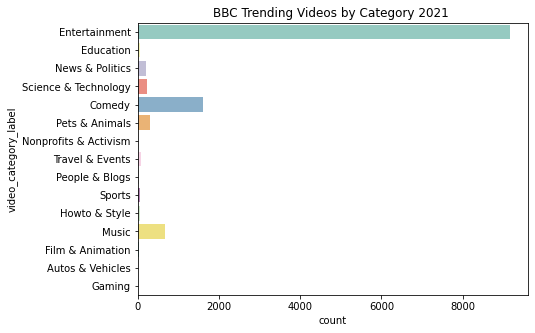

In [5]:
# Create a horizontal bar chart
plt.figure(figsize=(7,5))
sns.countplot(data=bbc, y="video_category_label", palette="Set3")
plt.title("BBC Trending Videos by Category 2021 ")
plt.show()

In [6]:
bbc2=bbc.dropna()

data = bbc2[ "video_description" ]
target = bbc2[ "video_category_label"]

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

vector = TfidfVectorizer(stop_words="english", max_features =2000)
train = vector.fit_transform(data)
train.shape 

(11783, 2000)

In [8]:
pca = PCA (n_components=2)
train_dimension = pca.fit_transform(train.toarray())

dataframe = pd.DataFrame(train_dimension)
dataframe.columns=["t1","t2"]
dataframe["video_category_label"] = target
dataframe.head(6)

,t1,t2,video_category_label
0,0.081312,-0.007914,Entertainment
1,0.086803,-0.032282,Entertainment
2,0.225250,-0.000688,NaN
3,0.026388,-0.030438,Education
4,0.242924,-0.015337,Entertainment
5,-0.015535,-0.014511,NaN


<Figure size 1080x1080 with 0 Axes>

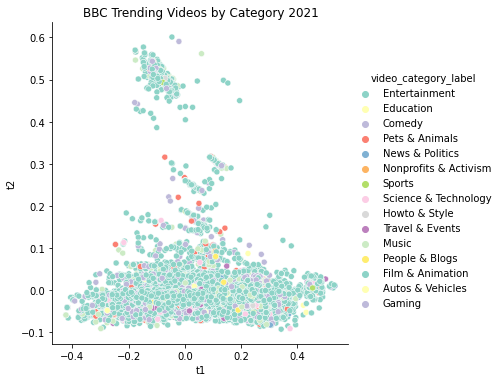

In [9]:
plt.figure(figsize=(15,15))
sns.relplot(data=dataframe, x="t1", y="t2", hue="video_category_label",palette="Set3")
plt.title("BBC Trending Videos by Category 2021")
plt.show()

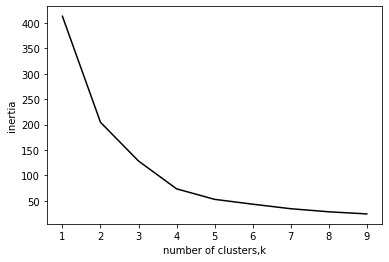

In [22]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt 

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,kmeans)

#Create a dataframe 
pipeline.fit(train_dimension)
predict = pd.DataFrame(pipeline.predict(train_dimension))

kms = range(1,10)
inertias = []

# Use "for" and create a graph 
for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(train_dimension)
  inertias.append(model.inertia_)

plt.plot(kms,inertias,'-0')
plt.xlabel('number of clusters,k')
plt.ylabel('inertia')
plt.xticks(kms)
plt.show()